# Restaurant Revenue Prediction

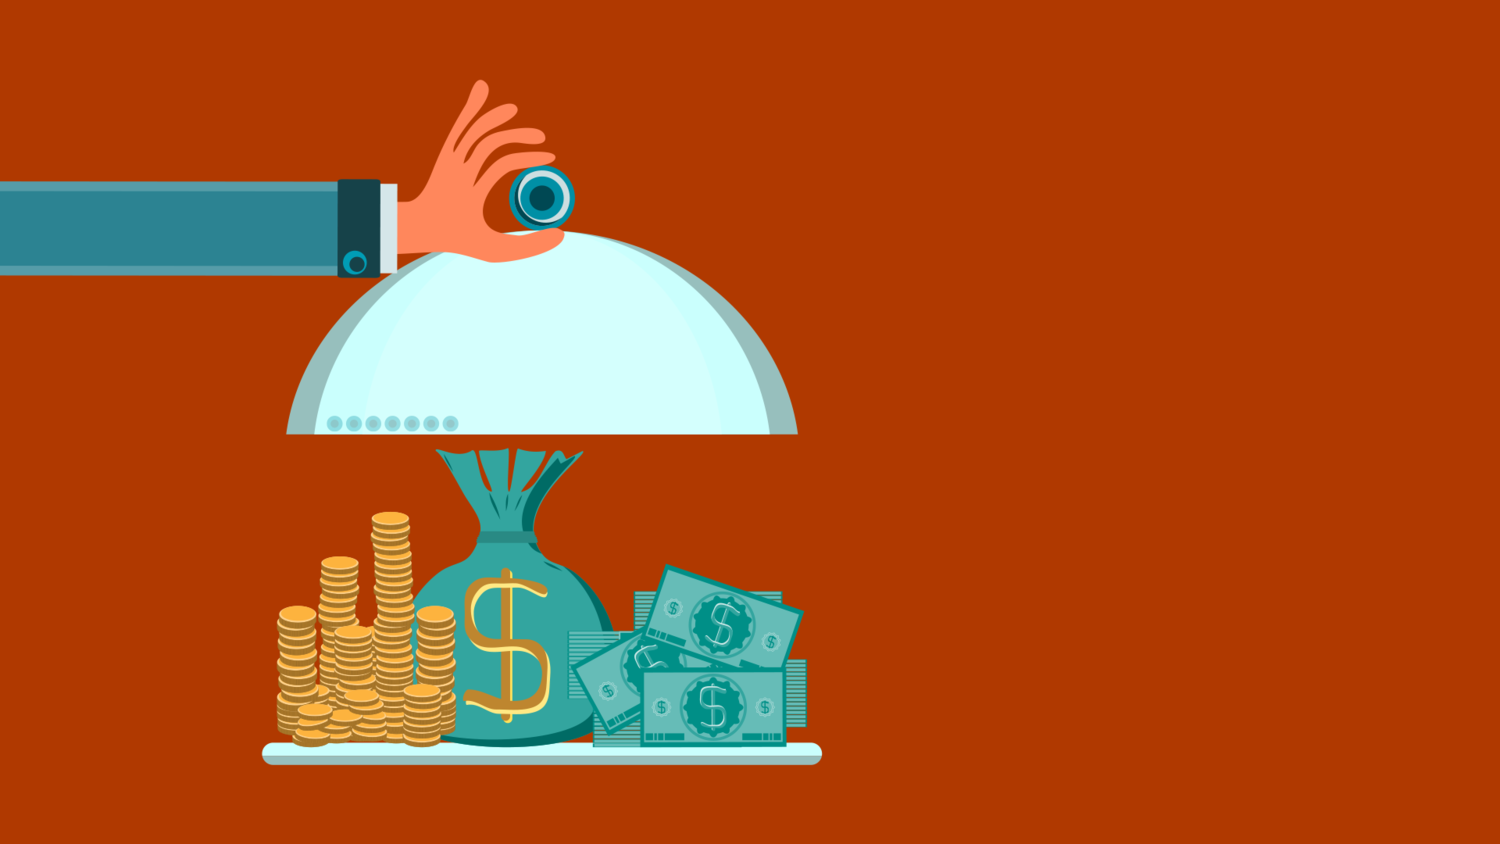
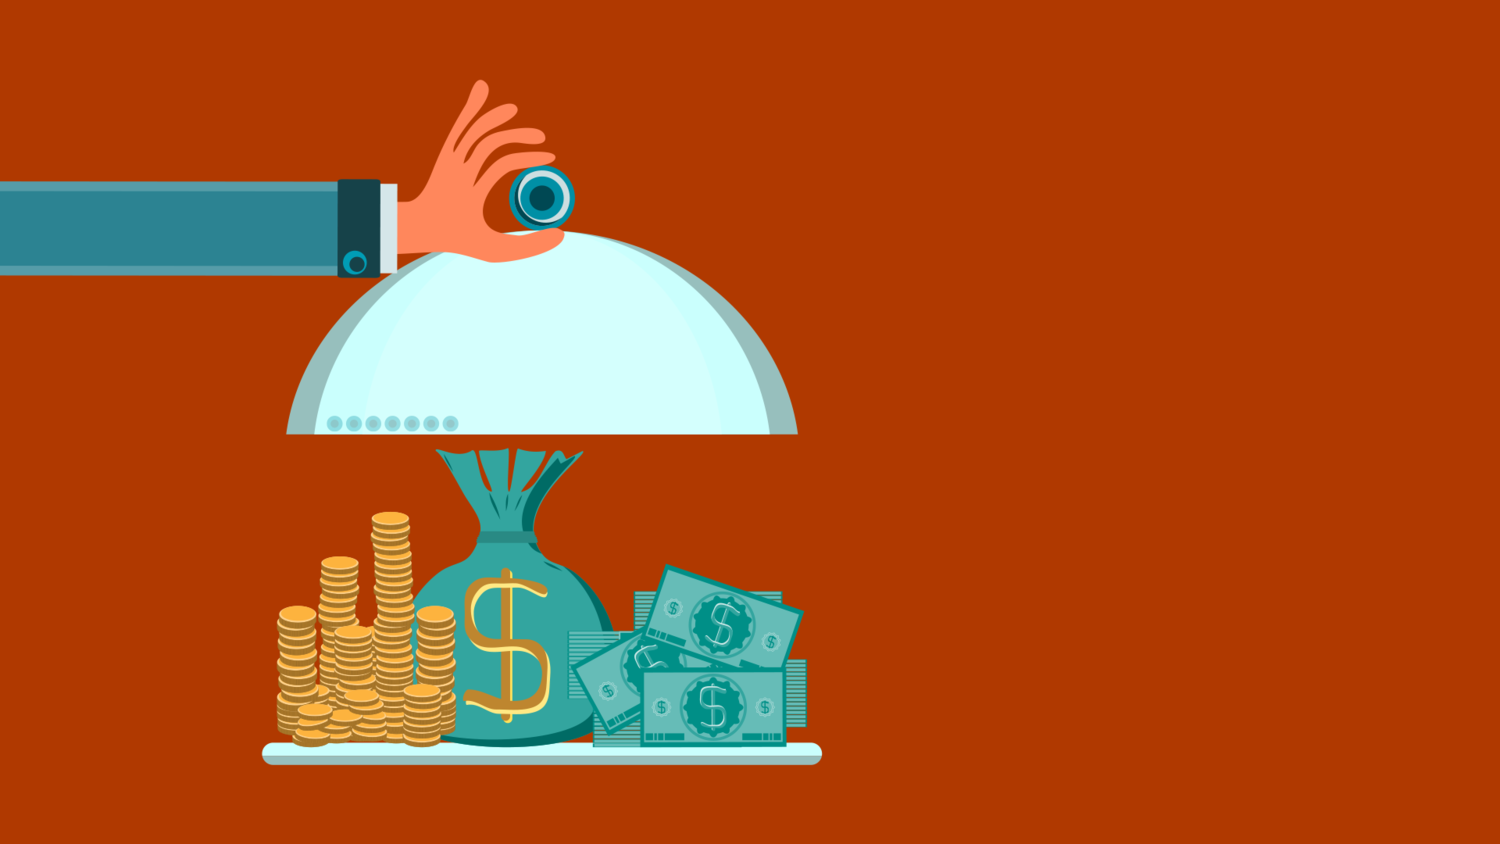

## Introduction
Predicting revenue is a crucial task for businesses aiming to optimize their operations and improve financial planning. By analyzing past data, we can identify patterns and factors that influence revenue generation. This project focuses on building a predictive model that estimates revenue based on various attributes related to location, business type, and other operational parameters.

## Aim
The goal of this project is to develop a machine learning model that predicts the revenue of businesses using the provided dataset. By understanding the impact of different features on revenue, the model can help stakeholders make informed decisions to enhance profitability.

## Dataset Column Explanation
- **Id**: Unique identifier for each record.
- **Open Date**: The date when the business was opened.
- **City**: The city where the business is located.
- **City Group**: Classification of the city as "Big Cities" or "Other."
- **Type**: Type of the business (e.g., IL, FC).
- **P1 - P37**: Various operational and business-related factors (e.g., performance metrics, customer-related features, or operational statistics).
- **Revenue**: The target variable representing the business revenue.

## Requirements

In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',None)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import normalize, scale

## Import Data

In [2]:
df=pd.read_csv('/kaggle/input/restaurant-revenue-prediction/train.csv.zip')
df_test=pd.read_csv('/kaggle/input/restaurant-revenue-prediction/test.csv.zip')

## EDA (Epxloratory Data Analysis)

In [3]:
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


In [4]:
df.shape

(137, 43)

In [5]:
df.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,137.0,6.800000e+01,3.969257e+01,0.0,34.0,68.0,102.0,136.0
P1,137.0,4.014599e+00,2.910391e+00,1.0,2.0,3.0,4.0,12.0
P2,137.0,4.408759e+00,1.514900e+00,1.0,4.0,5.0,5.0,7.5
P3,137.0,4.317518e+00,1.032337e+00,0.0,4.0,4.0,5.0,7.5
P4,137.0,4.372263e+00,1.016462e+00,3.0,4.0,4.0,5.0,7.5
P5,137.0,2.007299e+00,1.209620e+00,1.0,1.0,2.0,2.0,8.0
P6,137.0,3.357664e+00,2.134235e+00,1.0,2.0,3.0,4.0,10.0
P7,137.0,5.423358e+00,2.296809e+00,1.0,5.0,5.0,5.0,10.0
P8,137.0,5.153285e+00,1.858567e+00,1.0,4.0,5.0,5.0,10.0
P9,137.0,5.445255e+00,1.834793e+00,4.0,4.0,5.0,5.0,10.0


In [8]:
df['City'].value_counts()

City
İstanbul          50
Ankara            19
İzmir              9
Bursa              5
Samsun             5
Sakarya            4
Antalya            4
Kayseri            3
Diyarbakır         3
Adana              3
Eskişehir          3
Tekirdağ           3
Muğla              2
Konya              2
Aydın              2
Trabzon            2
Gaziantep          1
Edirne             1
Şanlıurfa          1
Elazığ             1
Kocaeli            1
Tokat              1
Afyonkarahisar     1
Uşak               1
Kırklareli         1
Kastamonu          1
Denizli            1
Karabük            1
Amasya             1
Balıkesir          1
Kütahya            1
Bolu               1
Isparta            1
Osmaniye           1
Name: count, dtype: int64

In [9]:
df['City Group'].value_counts()

City Group
Big Cities    78
Other         59
Name: count, dtype: int64

In [10]:
df['Type'].value_counts()

Type
FC    76
IL    60
DT     1
Name: count, dtype: int64

## Data Visualization

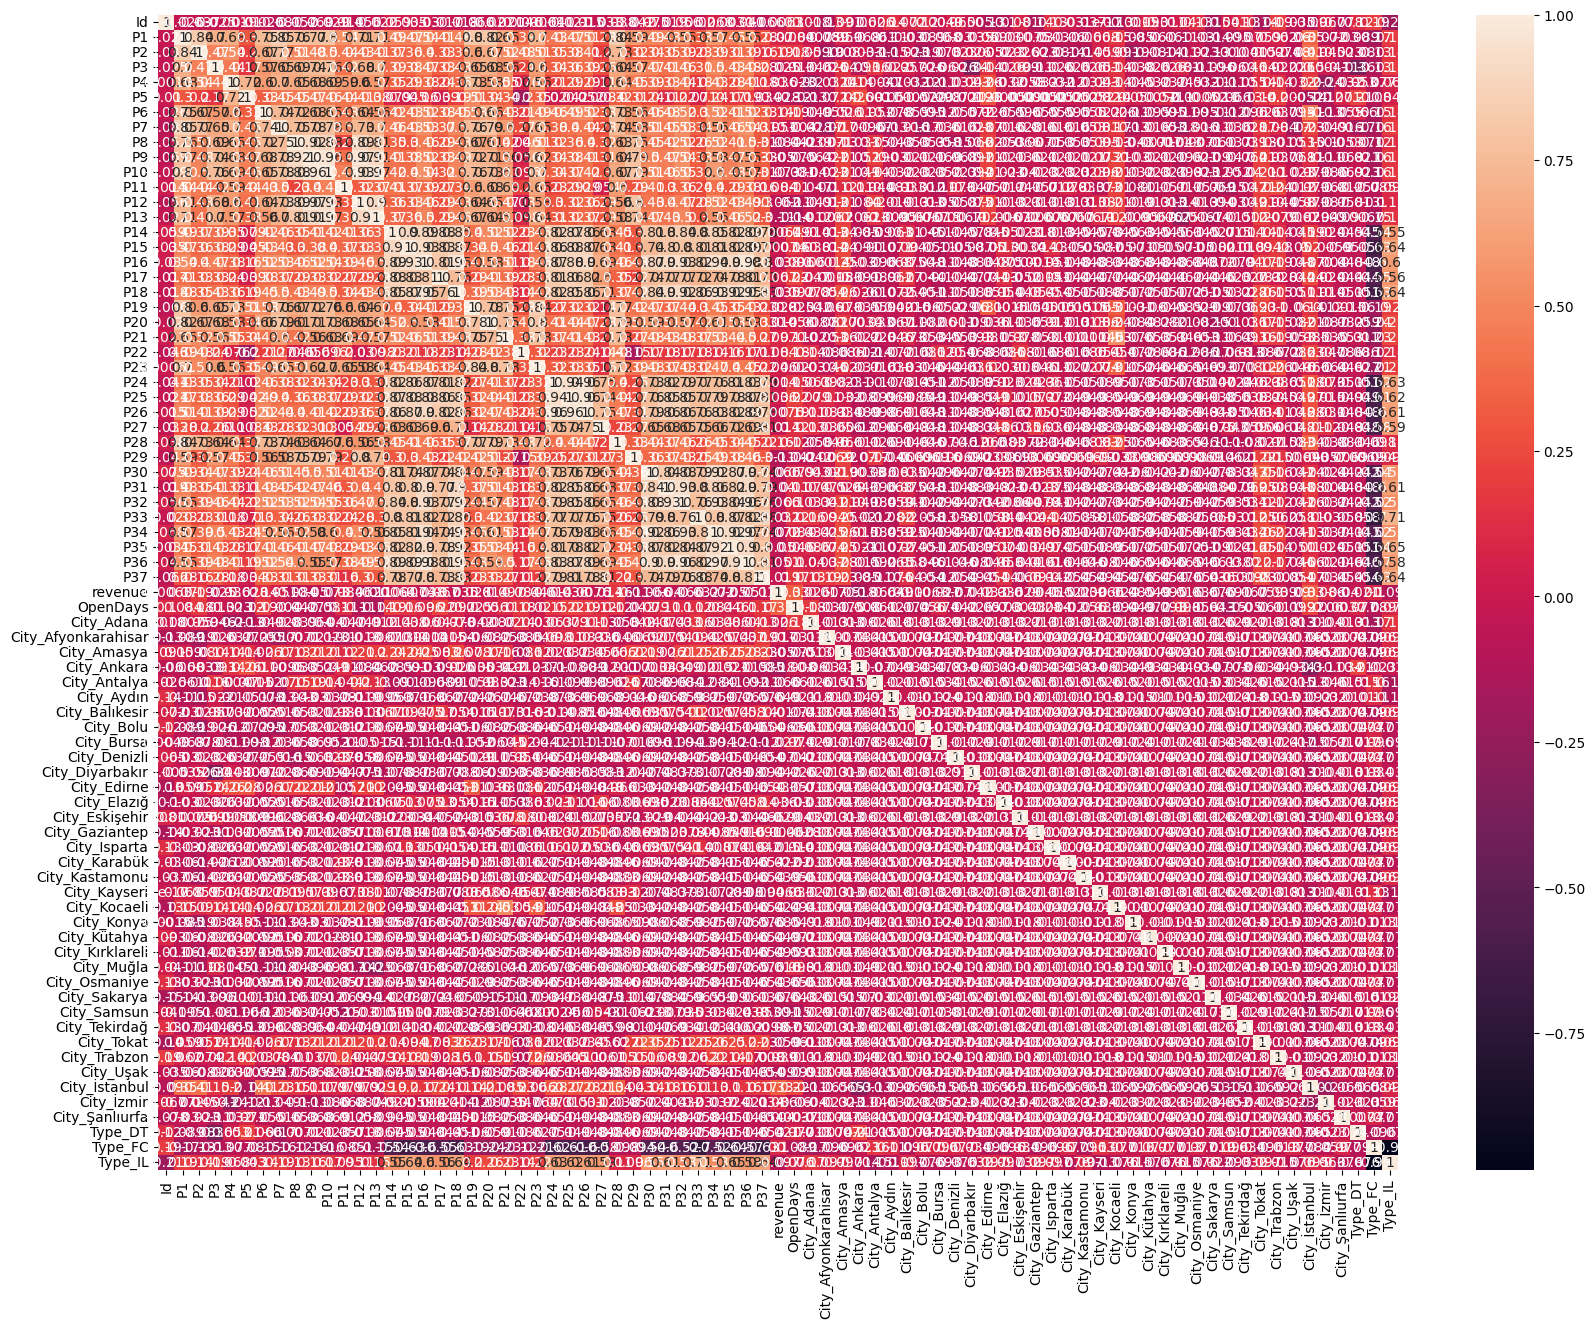

In [34]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(numeric_only=True),annot=True);

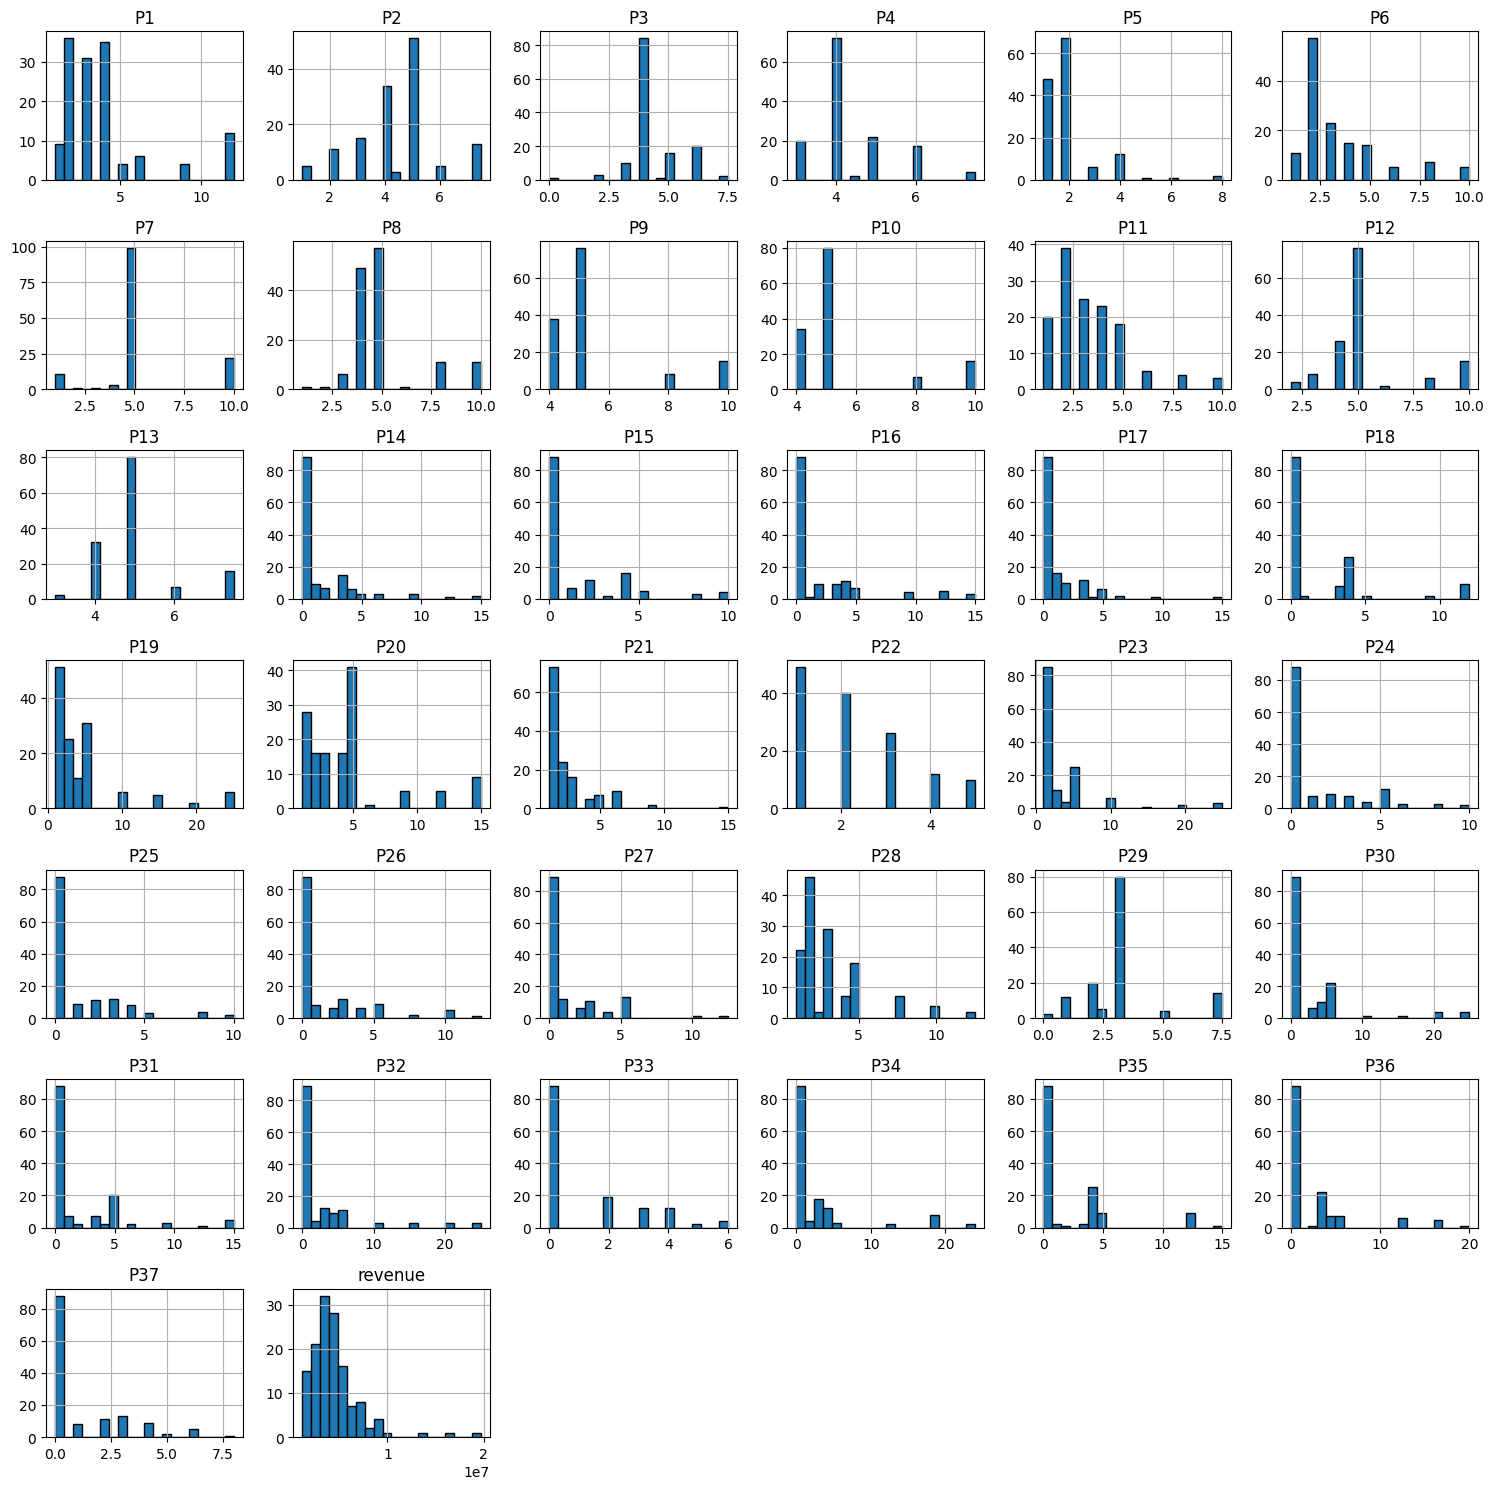

In [12]:
numerical_cols = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue']
df[numerical_cols].hist(bins=20, figsize=(15, 15), edgecolor='black')
plt.tight_layout()
plt.show()

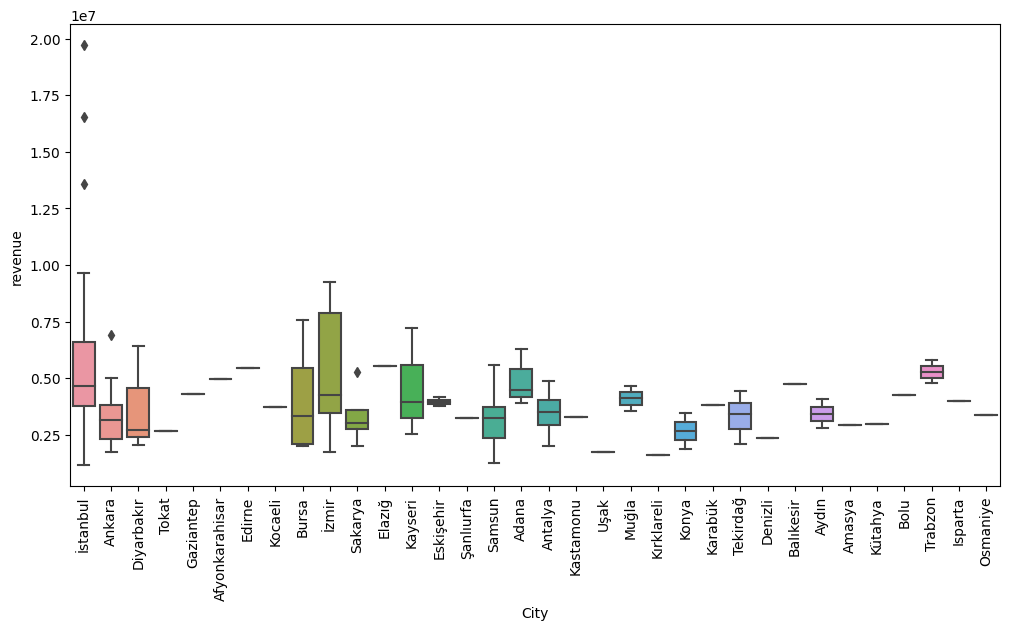

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='City', y='revenue')
plt.xticks(rotation=90)
plt.show()

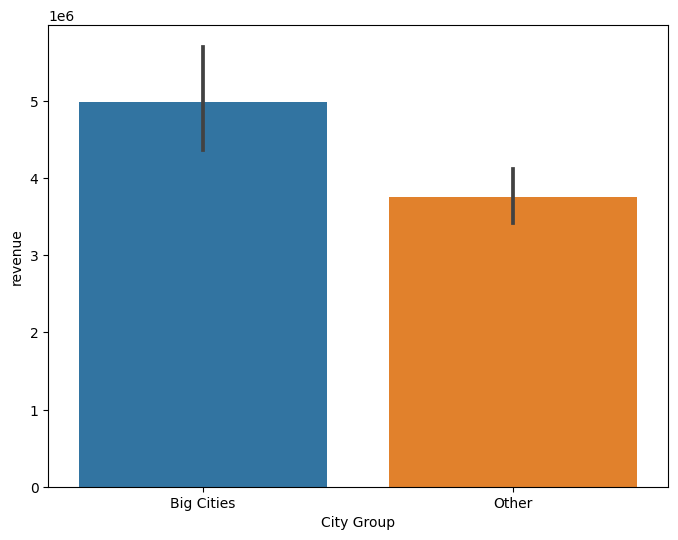

In [14]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='City Group', y='revenue')
plt.show()

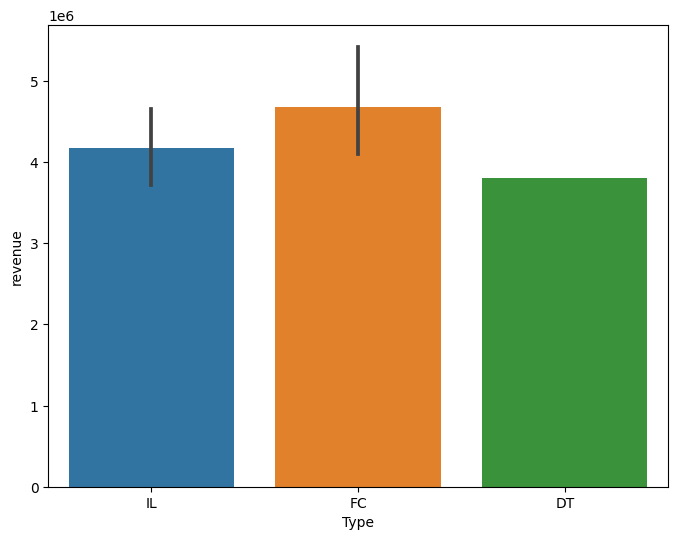

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Type', y='revenue')
plt.show()

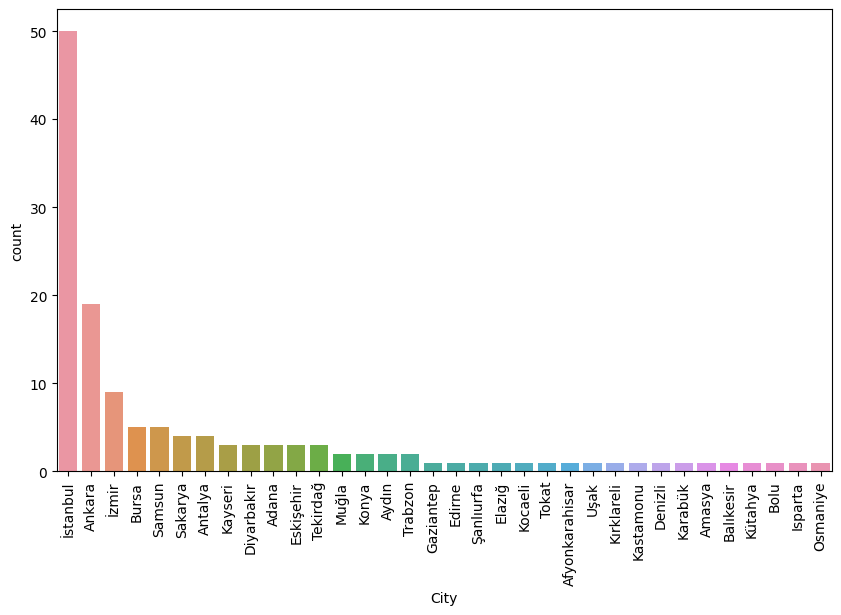

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='City', order=df['City'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

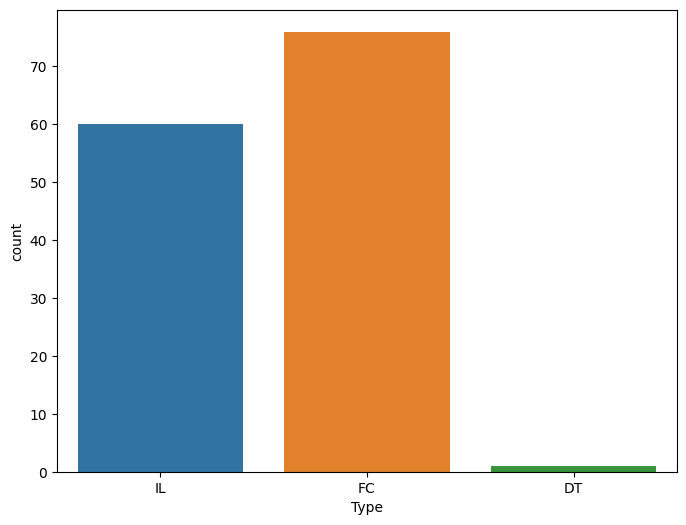

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Type')
plt.show()

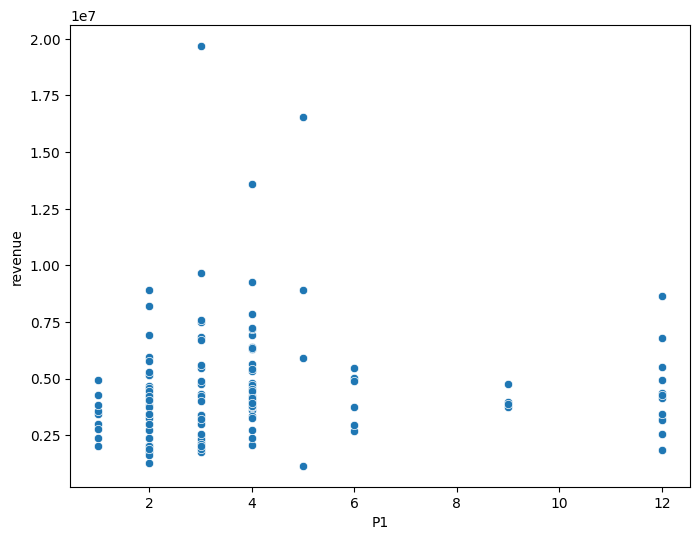

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='P1', y='revenue')
plt.show()

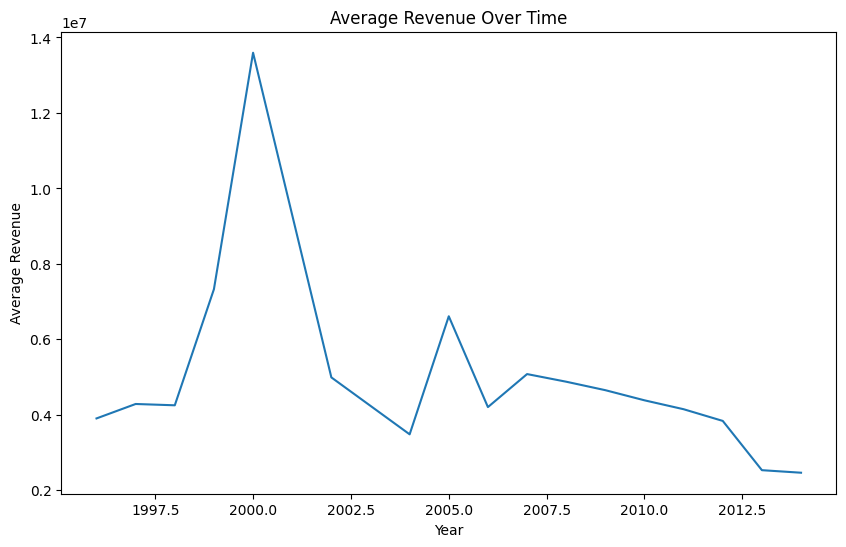

In [19]:
# Convert 'Open Date' to datetime
df['Open Date'] = pd.to_datetime(df['Open Date'], format='%m/%d/%Y')

# Plot revenue over time
plt.figure(figsize=(10, 6))
df.groupby(df['Open Date'].dt.year)['revenue'].mean().plot()
plt.xlabel('Year')
plt.ylabel('Average Revenue')
plt.title('Average Revenue Over Time')
plt.show()

## Feature Engineering

In [20]:
def feature_engineering(df):
    df['Open Date'] = pd.to_datetime(df['Open Date'], format='%m/%d/%Y')
    df['OpenDays'] = (pd.to_datetime('01/01/2015', format='%m/%d/%Y') - df['Open Date']).dt.days

In [21]:
feature_engineering(df)

In [22]:
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDays
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,5647
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,2513
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,663
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,1064
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,2063


## Modelling

In [23]:
abs(df.corr(numeric_only=True)['revenue'].sort_values(ascending=False))

revenue     1.000000
OpenDays    0.325821
P2          0.191518
P28         0.155534
P6          0.139094
P21         0.097411
P11         0.084247
P22         0.083562
P1          0.070217
P17         0.067137
P7          0.051165
P23         0.045507
P25         0.036365
P4          0.035685
P19         0.027984
P24         0.014222
P20         0.014147
P14         0.006441
P15         0.000742
Id          0.006277
P26         0.007650
P27         0.013680
P37         0.019051
P3          0.024613
P5          0.028191
P33         0.032426
P18         0.034537
P16         0.037997
P31         0.040418
P35         0.050156
P9          0.050352
P36         0.050534
P12         0.062193
P32         0.065857
P30         0.066203
P34         0.072343
P10         0.073220
P8          0.084215
P13         0.105085
P29         0.114846
Name: revenue, dtype: float64

In [24]:
city_dummies_train = pd.get_dummies(df['City'], prefix='City')
city_dummies_test = pd.get_dummies(df_test['City'], prefix='City')

# Ensure that the columns match for both dataframes by joining with missing columns in the test data
city_dummies_train, city_dummies_test = city_dummies_train.align(city_dummies_test, join='left', axis=1, fill_value=0)

# Add the one-hot encoded columns back to the original dataframe
df = df.join(city_dummies_train)
df_test = df_test.join(city_dummies_test)

# Drop the original 'City' column
df = df.drop('City', axis=1)
df_test = df_test.drop('City', axis=1)

In [25]:
# One-hot encode the 'Type' column
type_dummies_train = pd.get_dummies(df['Type'], prefix='Type')
type_dummies_test = pd.get_dummies(df_test['Type'], prefix='Type')

# Ensure that the columns match for both dataframes by joining with missing columns in the test data
type_dummies_train, type_dummies_test = type_dummies_train.align(type_dummies_test, join='left', axis=1, fill_value=0)

# Add the one-hot encoded columns back to the original dataframe
df = df.join(type_dummies_train)
df_test = df_test.join(type_dummies_test)

# Drop the original 'Type' column
df = df.drop('Type', axis=1)
df_test = df_test.drop('Type', axis=1)


In [26]:
df.head()

,Id,Open Date,City Group,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDays,City_Adana,City_Afyonkarahisar,City_Amasya,City_Ankara,City_Antalya,City_Aydın,City_Balıkesir,City_Bolu,City_Bursa,City_Denizli,City_Diyarbakır,City_Edirne,City_Elazığ,City_Eskişehir,City_Gaziantep,City_Isparta,City_Karabük,City_Kastamonu,City_Kayseri,City_Kocaeli,City_Konya,City_Kütahya,City_Kırklareli,City_Muğla,City_Osmaniye,City_Sakarya,City_Samsun,City_Tekirdağ,City_Tokat,City_Trabzon,City_Uşak,City_İstanbul,City_İzmir,City_Şanlıurfa,Type_DT,Type_FC,Type_IL
0,0,1999-07-17,Big Cities,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,5647,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
1,1,2008-02-14,Big Cities,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,2513,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,2,2013-03-09,Other,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,663,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,3,2012-02-02,Other,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,1064,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
4,4,2009-05-09,Other,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,2063,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [27]:
x = df[['OpenDays', 'P2', 'P28', 'City Group', 'P8', 'P22', 'P24', 'P26'] + list(city_dummies_train.columns)+list(type_dummies_train.columns)]
y =df[['revenue']]

In [28]:
x=pd.get_dummies(x,drop_first=True)

In [29]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

def regression_algo(x, y, plot=False):
    L = LinearRegression()
    R = Ridge()
    Lass = Lasso()
    E = ElasticNet()
    ETR = ExtraTreeRegressor()
    GBR = GradientBoostingRegressor()
    kn = KNeighborsRegressor()
    dt = DecisionTreeRegressor()
    xgb = XGBRegressor()
    rf = RandomForestRegressor()
    lgbm = LGBMRegressor(verbosity=-1)

    algos = [L, R, Lass, E, ETR, GBR, kn, dt, xgb, rf, lgbm]
    algo_names = ['Linear', 'Ridge', 'Lasso', 'ElasticNet', 'Extra Tree', 'Gradient Boosting',
                  'KNeighborsRegressor', 'DecisionTreeRegressor', 'XGBRegressor',
                  'RandomForestRegressor', 'LGBMRegressor']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

    r_squared = []
    rmse = []
    mae = []

    result = pd.DataFrame(columns=['R_Squared', 'RMSE', 'MAE'], index=algo_names)

    for algo in algos:
        p = algo.fit(x_train, y_train).predict(x_test)
        r_squared.append(r2_score(y_test, p))
        rmse.append(mean_squared_error(y_test, p) ** 0.5)
        mae.append(mean_absolute_error(y_test, p))

    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE = mae

    r_table = result.sort_values('R_Squared', ascending=False)
    
    if plot:
        best_model = algos[r_squared.index(max(r_squared))]
        y_pred = best_model.predict(x_test)
        
        plt.figure(figsize=(10, 6))
        plt.plot(y_test.reset_index(drop=True), label='Actual', color='green', linestyle='--')
        plt.plot(pd.Series(y_pred), label='Predicted', color='red', linestyle='--')
        plt.xlabel('Predicted Price')
        plt.ylabel('Actual Price')
        plt.title('Actual vs Predicted Price for Best Model')
        plt.legend()
        plt.show()
    
    return r_table

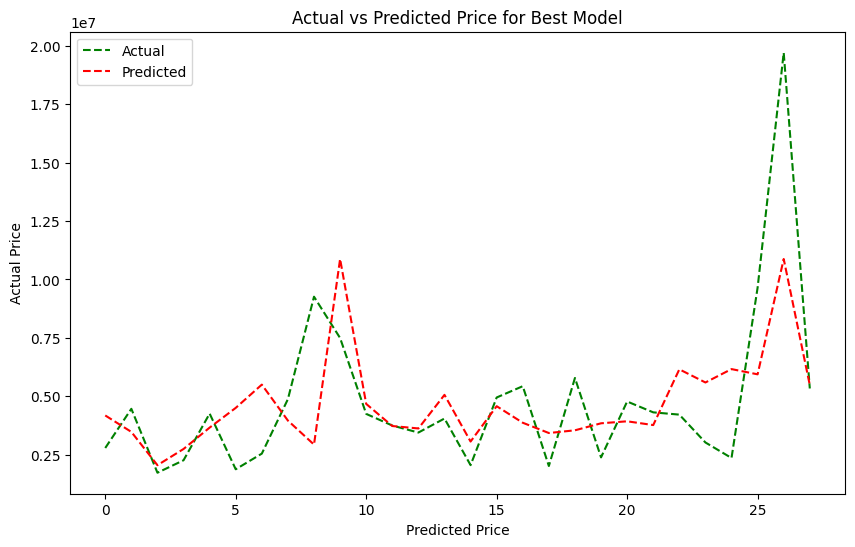

,R_Squared,RMSE,MAE
XGBRegressor,0.407794,2.691656e+06,1.858699e+06
Gradient Boosting,0.341795,2.837682e+06,1.970790e+06
DecisionTreeRegressor,0.259203,3.010458e+06,2.071529e+06
Lasso,0.230002,3.069220e+06,1.874999e+06
RandomForestRegressor,0.226462,3.076266e+06,1.849299e+06
Linear,0.222564,3.084007e+06,1.902853e+06
Ridge,0.211806,3.105273e+06,1.906553e+06
ElasticNet,0.195269,3.137678e+06,1.877673e+06
KNeighborsRegressor,0.182092,3.163264e+06,1.912894e+06
LGBMRegressor,0.114121,3.292081e+06,2.076034e+06


In [30]:
regression_algo(x,y,plot=True)

In [31]:
xgb = XGBRegressor()
model = xgb.fit(x, y)

In [32]:
import joblib
joblib.dump(model, 'best_regression_model.pkl')

['best_regression_model.pkl']

## Testing the Model

In [35]:
submission=pd.DataFrame({
    'id':df_test['Id']
})

In [36]:
feature_engineering(df_test)

In [37]:
df_test= df_test[['OpenDays', 'P2', 'P28', 'City Group', 'P8', 'P22', 'P24', 'P26'] + list(city_dummies_test.columns)+list(type_dummies_test.columns)]

In [38]:
df_test=pd.get_dummies(df_test,drop_first=True)

In [39]:
predictions = model.predict(df_test)

In [40]:
predictions

array([3972552.8, 2050720.6, 2007132.9, ..., 2295876.5, 3429199.2,
       4958274. ], dtype=float32)

In [41]:
submission['Prediction']=predictions

In [43]:
submission.head()

,id,Prediction
0,0,3972552.750
1,1,2050720.625
2,2,2007132.875
3,3,2930684.000
4,4,3416285.250


In [42]:
submission.to_csv('submission.csv',index=False)

## Conclusion
The performance of various regression models was evaluated based on R-Squared, RMSE, and MAE. The results indicate that **XGBRegressor** achieved the best performance with an R-Squared score of **0.4078**, RMSE of **2.69 million**, and MAE of **1.85 million**. This suggests that while the model captures some variance in the data, there is still room for improvement.

Among the other models, **Gradient Boosting** and **DecisionTreeRegressor** also performed relatively well but did not surpass XGBRegressor. Linear models such as **Lasso, Ridge, and ElasticNet** had lower predictive power, indicating that a simple linear approach may not be sufficient for capturing the complexity of revenue prediction.

Interestingly, **RandomForestRegressor** and **LGBMRegressor** did not perform as expected, suggesting that the dataset may require additional feature engineering or hyperparameter tuning to improve performance. The worst-performing model was **Extra Tree**, which had the lowest R-Squared value and the highest error rates.